In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image


2024-04-04 16:59:25.792958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from skimage.transform import resize

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to 42x42
x_train_resized = np.zeros((x_train.shape[0], 42, 42))
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (42, 42))

x_test_resized = np.zeros((x_test.shape[0], 42, 42))
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (42, 42))

# Reshape to add channel dimension (required for Keras)
x_train_resized = x_train_resized.reshape(-1, 42, 42, 1)
x_test_resized = x_test_resized.reshape(-1, 42, 42, 1)

# Normalize pixel values to range [0, 1]
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(42, 42, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train_resized, y_train, batch_size=128, epochs=10, validation_data=(x_test_resized, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_resized, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


2024-04-04 17:12:30.101773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
469/469 [==============================] - 48s 100ms/step - loss: 0.9458 - accuracy: 0.6989 - val_loss: 0.3480 - val_accuracy: 0.8979
Epoch 2/10
469/469 [==============================] - 47s 100ms/step - loss: 0.3024 - accuracy: 0.9082 - val_loss: 0.2520 - val_accuracy: 0.9232
Epoch 3/10
469/469 [==============================] - 46s 99ms/step - loss: 0.2349 - accuracy: 0.9292 - val_loss: 0.2089 - val_accuracy: 0.9389
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.1889 - accuracy: 0.9438 - val_loss: 0.1587 - val_accuracy: 0.9525
Epoch 5/10
469/469 [==============================] - 47s 99ms/step - loss: 0.1588 - accuracy: 0.9523 - val_loss: 0.1347 - val_accuracy: 0.9590
Epoch 6/10
469/469 [==============================] - 46s 98ms/step - loss: 0.1352 - accuracy: 0.9598 - val_loss: 0.1257 - val_accuracy: 0.9617
Epoch 7/10
182/469 [==========>...................] - ETA: 26s - loss: 0.1190 - accuracy: 0.9650

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [9]:
x_train_resized = np.zeros((x_train.shape[0], 42, 42))
x_test_resized = np.zeros((x_test.shape[0], 42, 42))

In [10]:
x_train = np.expand_dims(x_train_resized, -1)
x_test = np.expand_dims(x_test_resized, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 42, 42, 1)
60000 train samples
10000 test samples


In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(60000, 10)


In [6]:
for i in range(len(x_train)):
    img = Image.fromarray(x_train[i])
    img_resized = img.resize((42, 42), resample=Image.LANCZOS)
    x_train_resized[i] = np.array(img_resized)

for i in range(len(x_test)):
    img = Image.fromarray(x_test[i])
    img_resized = img.resize((42, 42), resample=Image.LANCZOS)
    x_test_resized[i] = np.array(img_resized)

In [12]:
# x_train_resized = np.expand_dims(x_train_resized, axis=-1)
# x_test_resized = np.expand_dims(x_test_resized, axis=-1)

# print("x_train_resized shape:", x_train_resized.shape)
# print("x_test_resized shape:", x_test_resized.shape)

print("x_train_resized shape:", x_train)
print("x_test_resized shape:", x_test)

x_train_resized shape: [[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
 

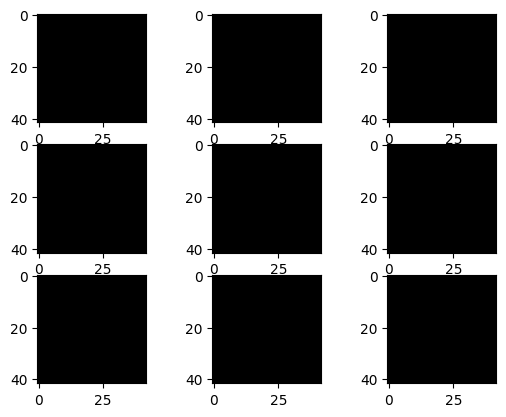

In [13]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [9]:
import numpy as np
from tensorflow import keras
from qkeras import QConv2D, QActivation, QDense
from tensorflow.keras.layers import Input, Flatten, Activation, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

In [10]:
# Define the input shape
input_shape = (28, 28, 1)

num_classes = 10

inputs = Input(shape=input_shape)
x = QConv2D(4, (3, 3), kernel_quantizer="quantized_bits(2,6)")(inputs)
x = QActivation("quantized_relu(2,6)")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = QConv2D(4, (3, 3), kernel_quantizer="quantized_bits(2,6)")(x)
x = QActivation("quantized_relu(2,6)")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = QDense(num_classes, activation="softmax", kernel_quantizer="quantized_bits(2,6)")(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

2024-04-04 16:51:28.192368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42, 42, 1)]       0         
                                                                 
 q_conv2d (QConv2D)          (None, 40, 40, 4)         40        
                                                                 
 q_activation (QActivation)  (None, 40, 40, 4)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 4)        0         
 )                                                               
                                                                 
 q_conv2d_1 (QConv2D)        (None, 18, 18, 4)         148

In [12]:
x_train, x_test = x_train_resized, x_test_resized
y_train, y_test = y_train, y_test


# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1688/1688 [==============================] - 29s 16ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 26s 15ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 26s 16ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 26s 16ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 6/10
 208/1688 [==>...........................] - ETA: 22s - loss: 2.3005 - accuracy: 0.1112

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import ModelCheckpoint

batch_size = 128
epochs = 15

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define a callback to save the weights during training
checkpoint_callback = ModelCheckpoint(filepath='model_weights.h5',  # Path to save the weights
                                      save_weights_only=True,       # Save only the weights
                                      monitor='val_accuracy',       # Monitor validation accuracy
                                      mode='max',                   # Save mode (maximize validation accuracy)
                                      save_best_only=True)         # Save only the best weights

# Train the model with the callback to save weights
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.1,
          callbacks=[checkpoint_callback])
